# 1. Library Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


# 2. 데이터 불러오기 및 확인

In [130]:
df_hitter = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/hitter_salary_stats_all.csv')
df_hw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/Height_Weight.csv')

In [131]:
df_runners = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/runner.csv')

In [132]:
df_hitter.shape

(818, 31)

In [133]:
df_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      818 non-null    int64  
 1   선수명     818 non-null    object 
 2   팀명      818 non-null    object 
 3   AVG     818 non-null    float64
 4   G       818 non-null    int64  
 5   PA      818 non-null    int64  
 6   AB      818 non-null    int64  
 7   R       818 non-null    int64  
 8   H       818 non-null    int64  
 9   2B      818 non-null    int64  
 10  3B      818 non-null    int64  
 11  HR      818 non-null    int64  
 12  TB      818 non-null    int64  
 13  RBI     818 non-null    int64  
 14  SAC     818 non-null    int64  
 15  SF      818 non-null    int64  
 16  BB      818 non-null    int64  
 17  IBB     818 non-null    int64  
 18  HBP     818 non-null    int64  
 19  SO      818 non-null    int64  
 20  GDP     818 non-null    int64  
 21  SLG     818 non-null    float64
 22  OB

In [387]:
df_hitter = df_hitter.drop(['순위'], axis=1)

In [135]:
df_runners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      1842 non-null   int64 
 1   선수명     1842 non-null   object
 2   팀명      1842 non-null   object
 3   G       1842 non-null   int64 
 4   SBA     1842 non-null   int64 
 5   SB      1842 non-null   int64 
 6   CS      1842 non-null   int64 
 7   SB%     1842 non-null   object
 8   OOB     1842 non-null   int64 
 9   PKO     1842 non-null   int64 
 10  연도      1842 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 158.4+ KB


In [136]:
df_runners['SB%'].replace('-','0',inplace=True)
df_runners['SB%'] = df_runners['SB%'].astype('float')

In [137]:
df_runners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      1842 non-null   int64  
 1   선수명     1842 non-null   object 
 2   팀명      1842 non-null   object 
 3   G       1842 non-null   int64  
 4   SBA     1842 non-null   int64  
 5   SB      1842 non-null   int64  
 6   CS      1842 non-null   int64  
 7   SB%     1842 non-null   float64
 8   OOB     1842 non-null   int64  
 9   PKO     1842 non-null   int64  
 10  연도      1842 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 158.4+ KB


In [138]:
df_runners

,순위,선수명,팀명,G,SBA,SB,CS,SB%,OOB,PKO,연도
0,1,김성현,SK,144,8,6,2,75.0,5,0,2020
1,1,페르난데스,두산,144,3,1,2,33.3,3,0,2020
2,1,박해민,삼성,144,31,24,7,77.4,4,2,2020
3,4,정은원,한화,142,21,14,7,66.7,6,2,2020
4,4,로하스,KT,142,8,4,4,50.0,10,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
1837,318,김서현,한화,1,0,0,0,0.0,0,0,2024
1838,318,박준영,한화,1,0,0,0,0.0,0,0,2024
1839,318,윤대경,한화,1,0,0,0,0.0,0,0,2024
1840,318,이태양,한화,1,0,0,0,0.0,0,0,2024


In [139]:
df_runners.drop('순위',axis=1,inplace=True)

In [140]:
df_hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   선수명     223 non-null    object
 1   팀명      223 non-null    object
 2   height  223 non-null    int64 
 3   weight  223 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.1+ KB


In [141]:
df_hw.head()

,선수명,팀명,height,weight
0,김규성,KIA,183,73
1,한승택,KIA,174,83
2,김도영,KIA,183,85
3,한준수,KIA,184,95
4,이우성,KIA,182,95


In [142]:
df_hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   선수명     223 non-null    object
 1   팀명      223 non-null    object
 2   height  223 non-null    int64 
 3   weight  223 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.1+ KB


# 3. EDA

### 3.1. 키, 몸무게와 관계있는 stat 살펴보기

In [143]:
df_2023 = df_eda.loc[df_hitter['연도'] == 2023]

In [144]:
df_2023.columns

Index(['선수명', '팀명', 'AVG', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SAC', 'SF', 'BB', 'IBB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP',
       'OPS', 'MH', 'RISP', 'PH-BA', '연도', '연봉(만원)', 'WAR', '후년연봉'],
      dtype='object')

In [145]:
df_hw.columns

Index(['선수명', '팀명', 'height', 'weight'], dtype='object')

In [146]:
df = pd.merge(left = df_2023, right = df_hw )

In [147]:
df_2023.shape

(217, 30)

In [148]:
df_hw.shape

(223, 4)

In [149]:
df

,선수명,팀명,AVG,G,PA,AB,R,H,2B,3B,...,OPS,MH,RISP,PH-BA,연도,연봉(만원),WAR,후년연봉,height,weight
0,소크라테스,KIA,0.285,142,608,547,91,156,31,3,...,0.807,41,0.303,0.000,2023,50000.0,4.60,50000.0,188,93
1,박찬호,KIA,0.301,130,507,452,73,136,18,4,...,0.734,42,0.355,0.000,2023,20000.0,4.71,30000.0,178,72
2,이우성,KIA,0.301,126,400,355,39,107,17,0,...,0.780,24,0.320,0.500,2023,5500.0,2.66,13000.0,182,95
3,최형우,KIA,0.302,121,508,431,64,130,27,1,...,0.887,35,0.317,0.667,2023,90000.0,3.93,100000.0,180,106
4,김선빈,KIA,0.320,119,473,419,41,134,16,0,...,0.739,36,0.333,0.000,2023,45000.0,2.69,60000.0,165,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,장진혁,한화,0.222,68,178,162,24,36,5,1,...,0.552,6,0.229,0.364,2023,6000.0,-0.44,5800.0,184,90
157,최인호,한화,0.298,41,148,131,23,39,5,3,...,0.790,10,0.240,0.250,2023,3800.0,1.49,4800.0,178,82
158,유로결,한화,0.146,27,53,48,5,7,1,0,...,0.340,1,0.125,0.000,2023,3300.0,-0.45,3300.0,186,83
159,하주석,한화,0.114,25,38,35,4,4,1,0,...,0.327,0,0.167,0.200,2023,10000.0,-0.58,7000.0,185,92


In [150]:
df_r_2023 = df_runners.loc[df_runners['연도'] == 2023]

df_all = pd.merge(left = df, right = df_r_2023, on=['선수명','팀명'])


In [151]:
df_all

,선수명,팀명,AVG,G_x,PA,AB,R,H,2B,3B,...,height,weight,G_y,SBA,SB,CS,SB%,OOB,PKO,연도_y
0,소크라테스,KIA,0.285,142,608,547,91,156,31,3,...,188,93,127,19,12,7,63.2,5,1,2023
1,박찬호,KIA,0.301,130,507,452,73,136,18,4,...,178,72,130,50,42,8,84.0,7,0,2023
2,이우성,KIA,0.301,126,400,355,39,107,17,0,...,182,95,80,4,1,3,25.0,1,1,2023
3,최형우,KIA,0.302,121,508,431,64,130,27,1,...,180,106,132,1,1,0,100.0,3,1,2023
4,김선빈,KIA,0.320,119,473,419,41,134,16,0,...,165,77,140,15,13,2,86.7,10,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,박상언,한화,0.200,86,161,145,13,29,5,1,...,185,90,56,3,0,3,0.0,0,0,2023
110,이원석,한화,0.190,81,138,116,20,22,1,1,...,177,69,20,0,0,0,0.0,0,0,2023
111,장진혁,한화,0.222,68,178,162,24,36,5,1,...,184,90,41,3,2,1,66.7,1,0,2023
112,유로결,한화,0.146,27,53,48,5,7,1,0,...,186,83,30,0,0,0,0.0,2,0,2023


In [152]:
df_all.columns

Index(['선수명', '팀명', 'AVG', 'G_x', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SAC', 'SF', 'BB', 'IBB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP',
       'OPS', 'MH', 'RISP', 'PH-BA', '연도_x', '연봉(만원)', 'WAR', '후년연봉', 'height',
       'weight', 'G_y', 'SBA', 'SB', 'CS', 'SB%', 'OOB', 'PKO', '연도_y'],
      dtype='object')

In [153]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     114 non-null    object 
 1   팀명      114 non-null    object 
 2   AVG     114 non-null    float64
 3   G_x     114 non-null    int64  
 4   PA      114 non-null    int64  
 5   AB      114 non-null    int64  
 6   R       114 non-null    int64  
 7   H       114 non-null    int64  
 8   2B      114 non-null    int64  
 9   3B      114 non-null    int64  
 10  HR      114 non-null    int64  
 11  TB      114 non-null    int64  
 12  RBI     114 non-null    int64  
 13  SAC     114 non-null    int64  
 14  SF      114 non-null    int64  
 15  BB      114 non-null    int64  
 16  IBB     114 non-null    int64  
 17  HBP     114 non-null    int64  
 18  SO      114 non-null    int64  
 19  GDP     114 non-null    int64  
 20  SLG     114 non-null    float64
 21  OBP     114 non-null    float64
 22  OP

In [154]:
sns.set_style("darkgrid")

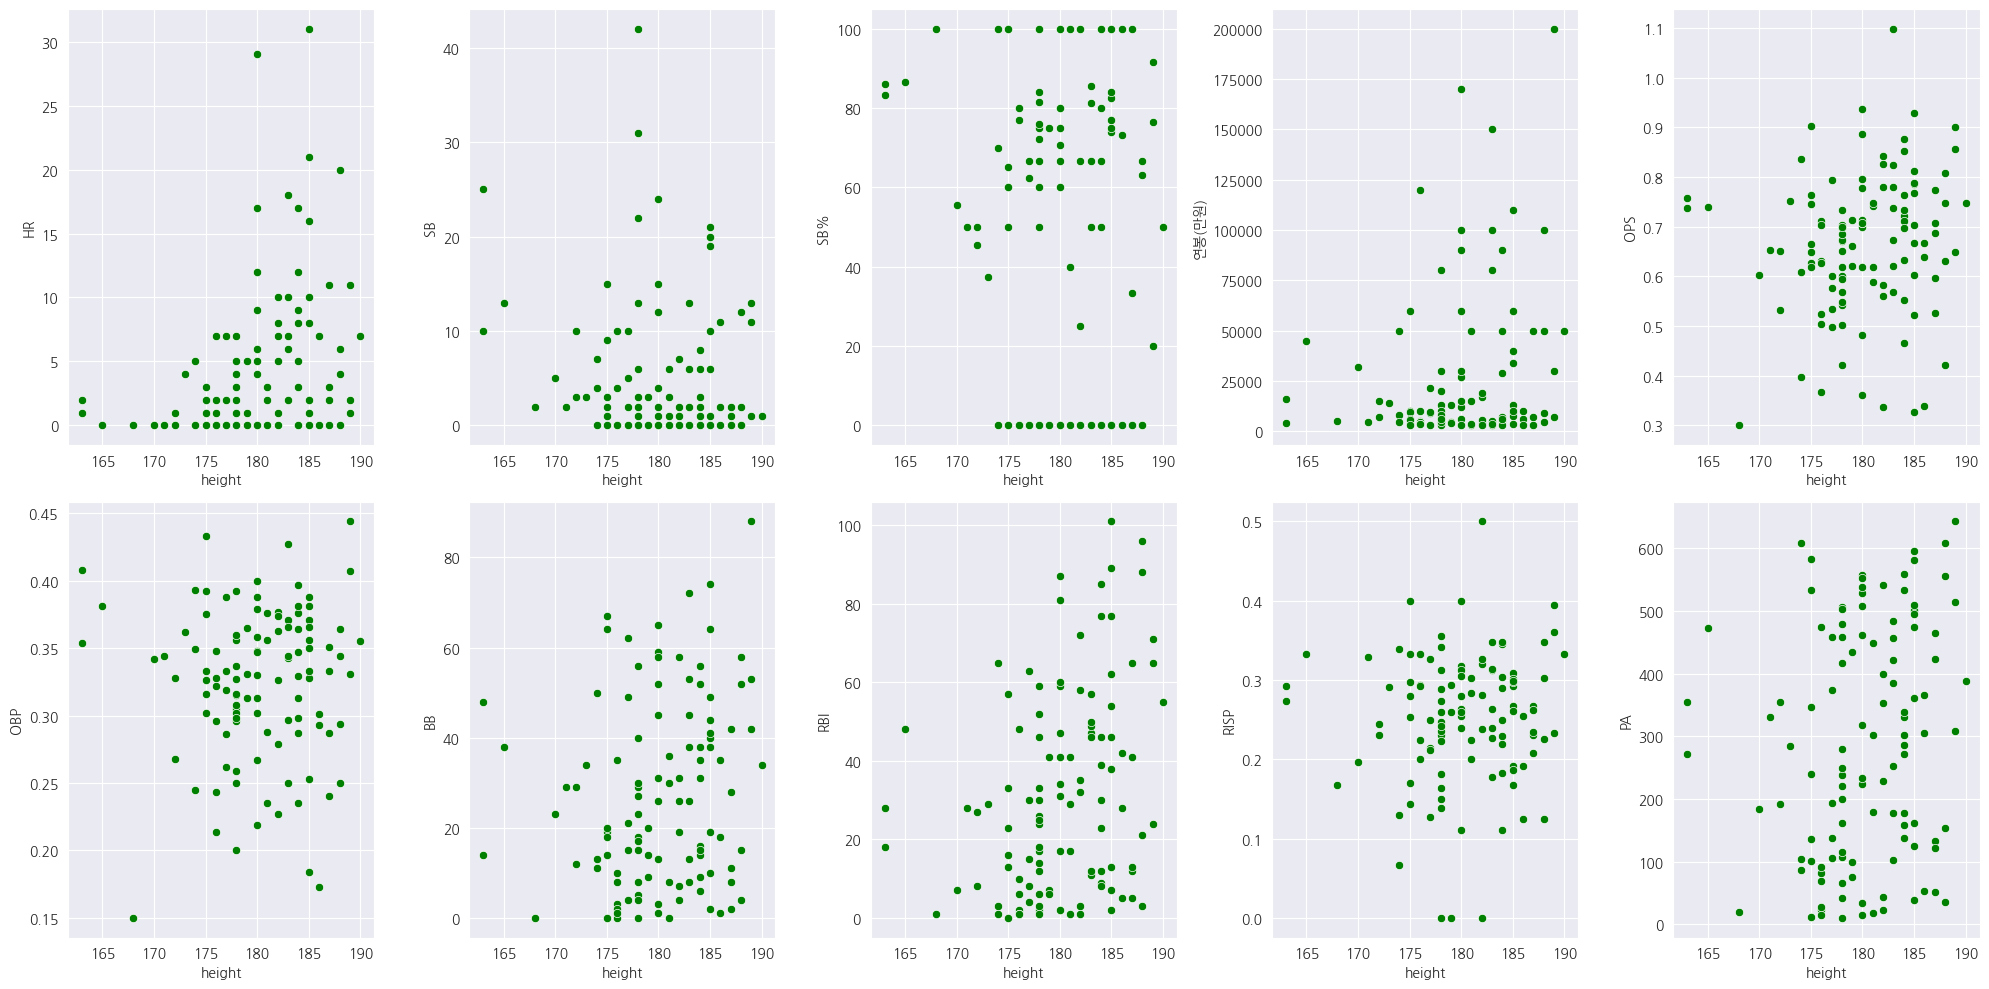

In [164]:
col_n = 5
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))
df_eda = df_all[['HR','SB','SB%','연봉(만원)','OPS','OBP','BB','RBI','RISP','PA','height']]
for i, col in enumerate(df_eda.columns[:-1]):
  sns.scatterplot(y=df_eda[col],x=df_eda['height'],ax=ax[int(i/col_n),int(i%col_n)],color='green')
plt.tight_layout()


## 3.1.1 키

Text(0, 0.5, '연봉')

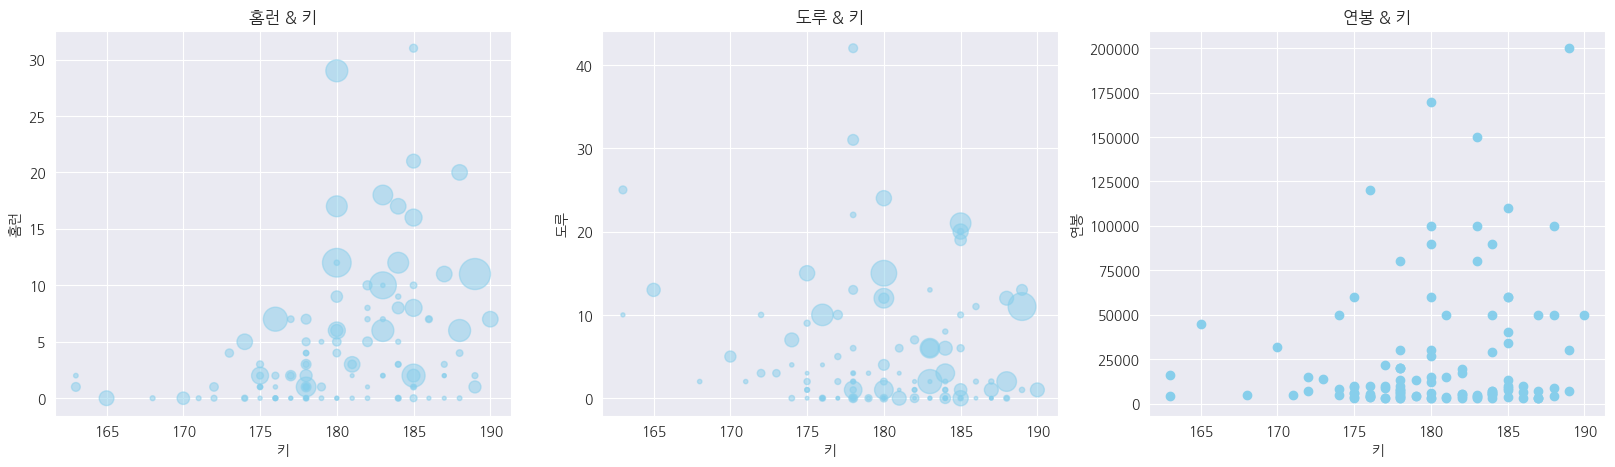

In [207]:
import numpy as np

col_n = 3
row_n = 1
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))

ax[0].scatter(y=df_all['HR'],x=df_all['height'],s=df_all['연봉(만원)']*0.0025,alpha=0.5, color='skyblue') # 홈런
ax[0].set_title('홈런 & 키')
ax[0].set_xlabel('키')
ax[0].set_ylabel('홈런')

ax[1].scatter(y=df_all['SB'],x=df_all['height'],s=df_all['연봉(만원)']*0.002,alpha=0.5, color='skyblue') # SB
ax[1].set_title('도루 & 키')
ax[1].set_xlabel('키')
ax[1].set_ylabel('도루')

ax[2].scatter(y=df_all['연봉(만원)'],x=df_all['height'],color='skyblue') # 연봉
ax[2].set_title('연봉 & 키')
ax[2].set_xlabel('키')
ax[2].set_ylabel('연봉')
# ax[2].fill([1.9, 1.9, 3.1, 3.1], [1.0, 4.0, 6.0, 3.0], color='lightgray', alpha=0.5)



## 3.1.2 몸무게

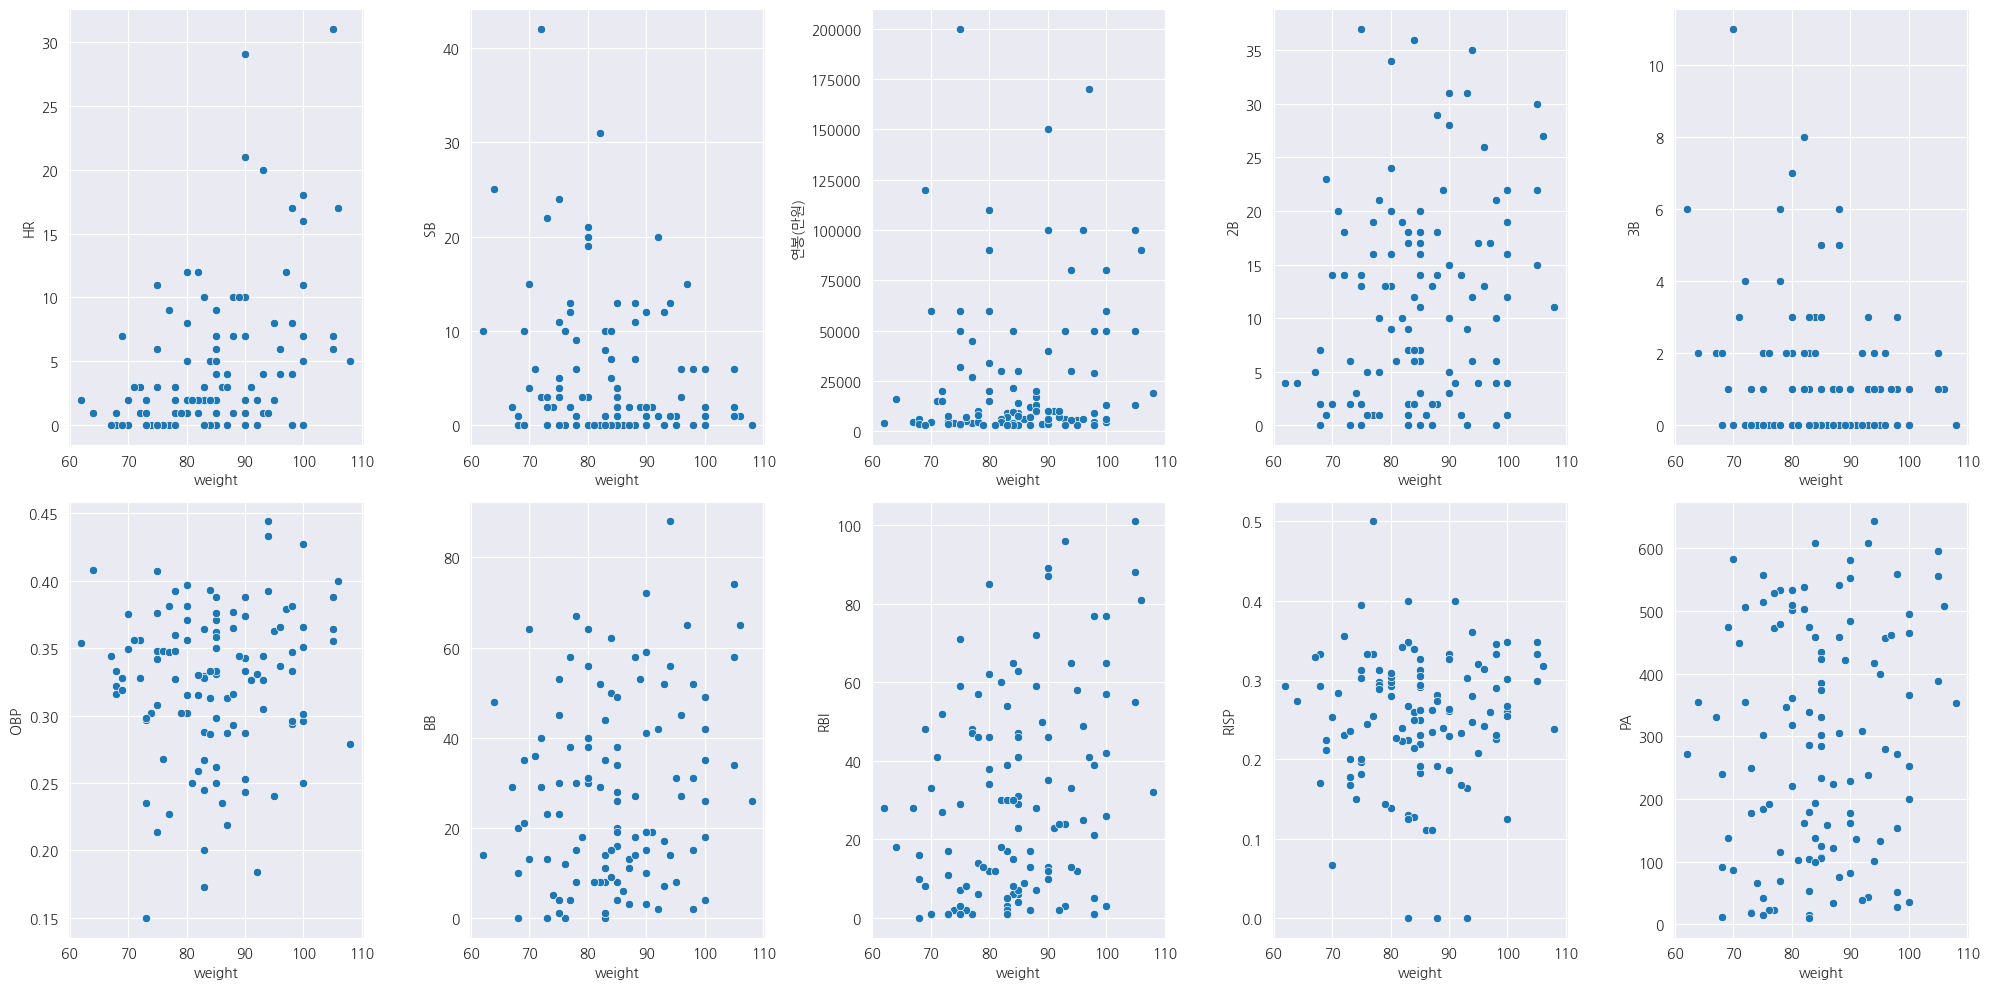

In [377]:
col_n = 5
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))
df_eda = df_all[['HR','SB','연봉(만원)','2B','3B','OBP','BB','RBI','RISP','PA','weight']]
for i, col in enumerate(df_eda.columns[:-1]):
  sns.scatterplot(y=df_eda[col],x=df_eda['weight'],ax=ax[int(i/col_n),int(i%col_n)])
plt.tight_layout()

Text(0, 0.5, '3B')

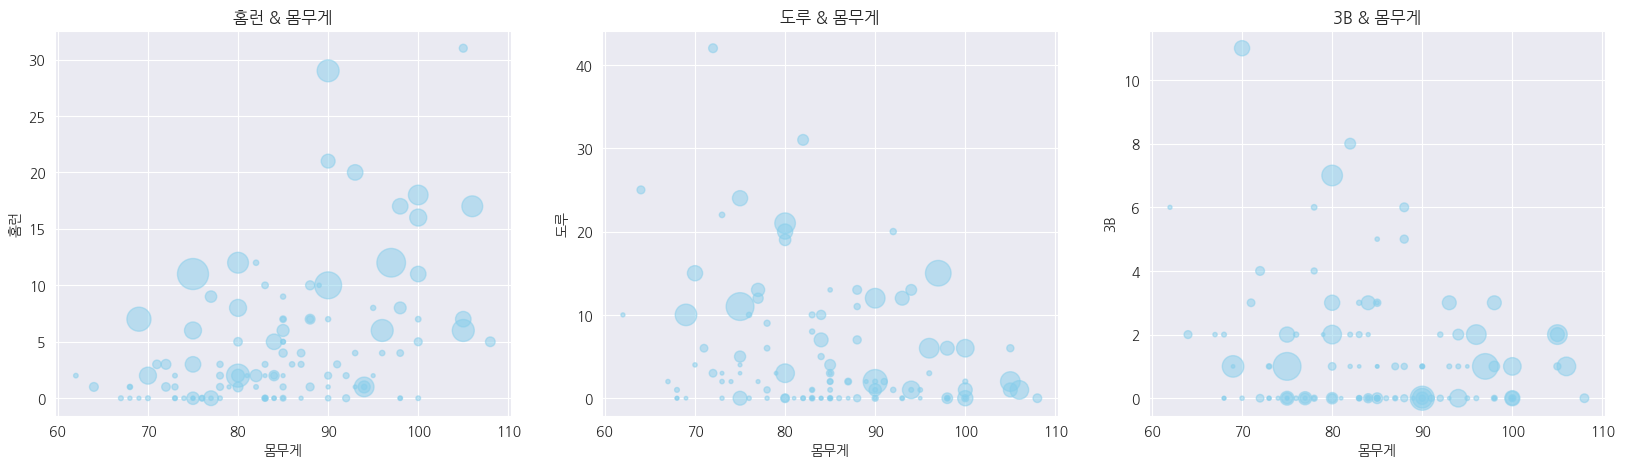

In [380]:
col_n = 3
row_n = 1
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))

ax[0].scatter(y=df_all['HR'],x=df_all['weight'],s=df_all['연봉(만원)']*0.0025,alpha=0.5, color='skyblue') # 홈런
ax[0].set_title('홈런 & 몸무게')
ax[0].set_xlabel('몸무게')
ax[0].set_ylabel('홈런')

ax[1].scatter(y=df_all['SB'],x=df_all['weight'],s=df_all['연봉(만원)']*0.002,alpha=0.5, color='skyblue') # SB
ax[1].set_title('도루 & 몸무게')
ax[1].set_xlabel('몸무게')
ax[1].set_ylabel('도루')

ax[2].scatter(y=df_all['3B'],x=df_all['weight'],s=df_all['연봉(만원)']*0.002,alpha=0.5,color='skyblue') # 연봉
ax[2].set_title('3B & 몸무게')
ax[2].set_xlabel('몸무게')
ax[2].set_ylabel('3B')



홈런은 힘이 좋아야 하니까 보통 몸무게가 많이 나가는 선수들이 잘하는 편이고  
3루타는 달리기를 잘해야하니까 몸이 가벼운 사람들이 잘하는 편

Text(0, 0.5, '안타')

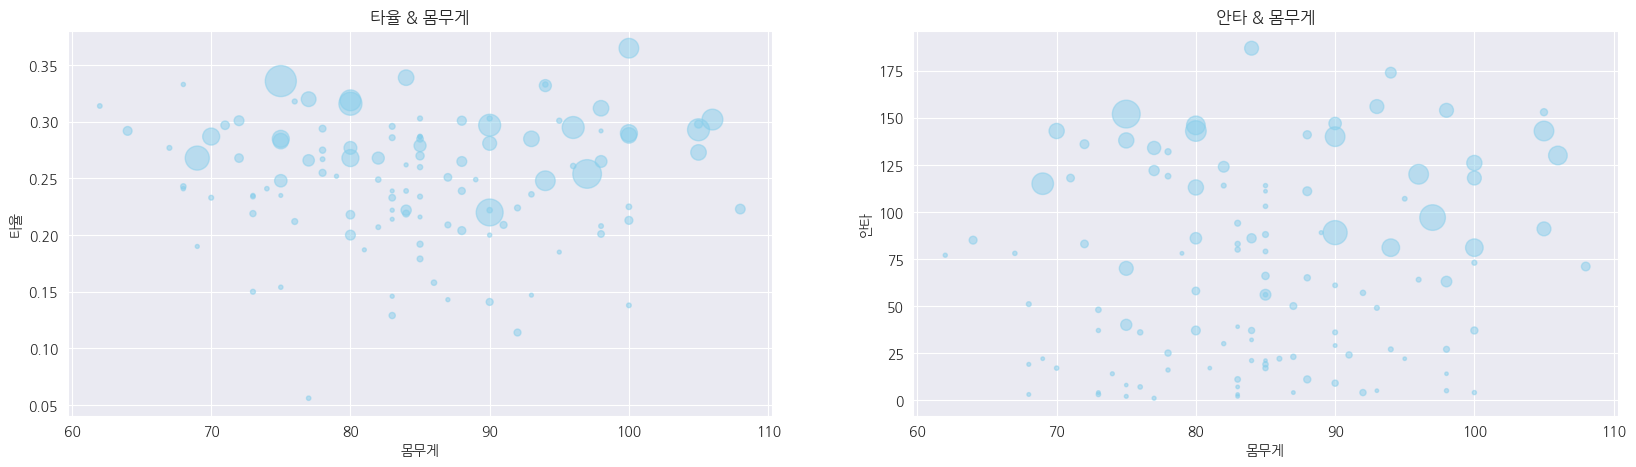

In [215]:
col_n = 2
row_n = 1
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))

ax[0].scatter(y=df_all['AVG'],x=df_all['weight'],s=df_all['연봉(만원)']*0.0025,alpha=0.5, color='skyblue') # 홈런
ax[0].set_title('타율 & 몸무게')
ax[0].set_xlabel('몸무게')
ax[0].set_ylabel('타율')

ax[1].scatter(y=df_all['H'],x=df_all['weight'],s=df_all['연봉(만원)']*0.002,alpha=0.5, color='skyblue') # SB
ax[1].set_title('안타 & 몸무게')
ax[1].set_xlabel('몸무게')
ax[1].set_ylabel('안타')

# ax[2].scatter(x=df_all['AVG'],y=df_all['H'],s=df_all['연봉(만원)']*0.002,alpha=0.5,color='skyblue') # 연봉
# ax[2].set_title('타율 & 안타')
# ax[2].set_xlabel('타율')
# ax[2].set_ylabel('안타')

## 3.2 팀별 연봉

In [218]:
df_eda

,HR,SB,연봉(만원),AVG,OPS,OBP,BB,RBI,RISP,PA,weight
0,20,12,50000.0,0.285,0.807,0.344,52,96,0.303,608,93
1,3,42,20000.0,0.301,0.734,0.356,40,52,0.355,507,72
2,8,1,5500.0,0.301,0.780,0.363,31,58,0.320,400,95
3,17,1,90000.0,0.302,0.887,0.400,65,81,0.317,508,106
4,0,13,45000.0,0.320,0.739,0.381,38,48,0.333,473,77
...,...,...,...,...,...,...,...,...,...,...,...
109,1,0,3600.0,0.200,0.522,0.253,10,13,0.186,161,90
110,0,0,3300.0,0.190,0.535,0.319,21,8,0.212,138,69
111,0,2,6000.0,0.222,0.552,0.287,15,12,0.229,178,90
112,0,0,3300.0,0.146,0.340,0.173,1,5,0.125,53,83


In [226]:
df_eda['연도'].unique()

array([2020, 2021, 2022, 2023])

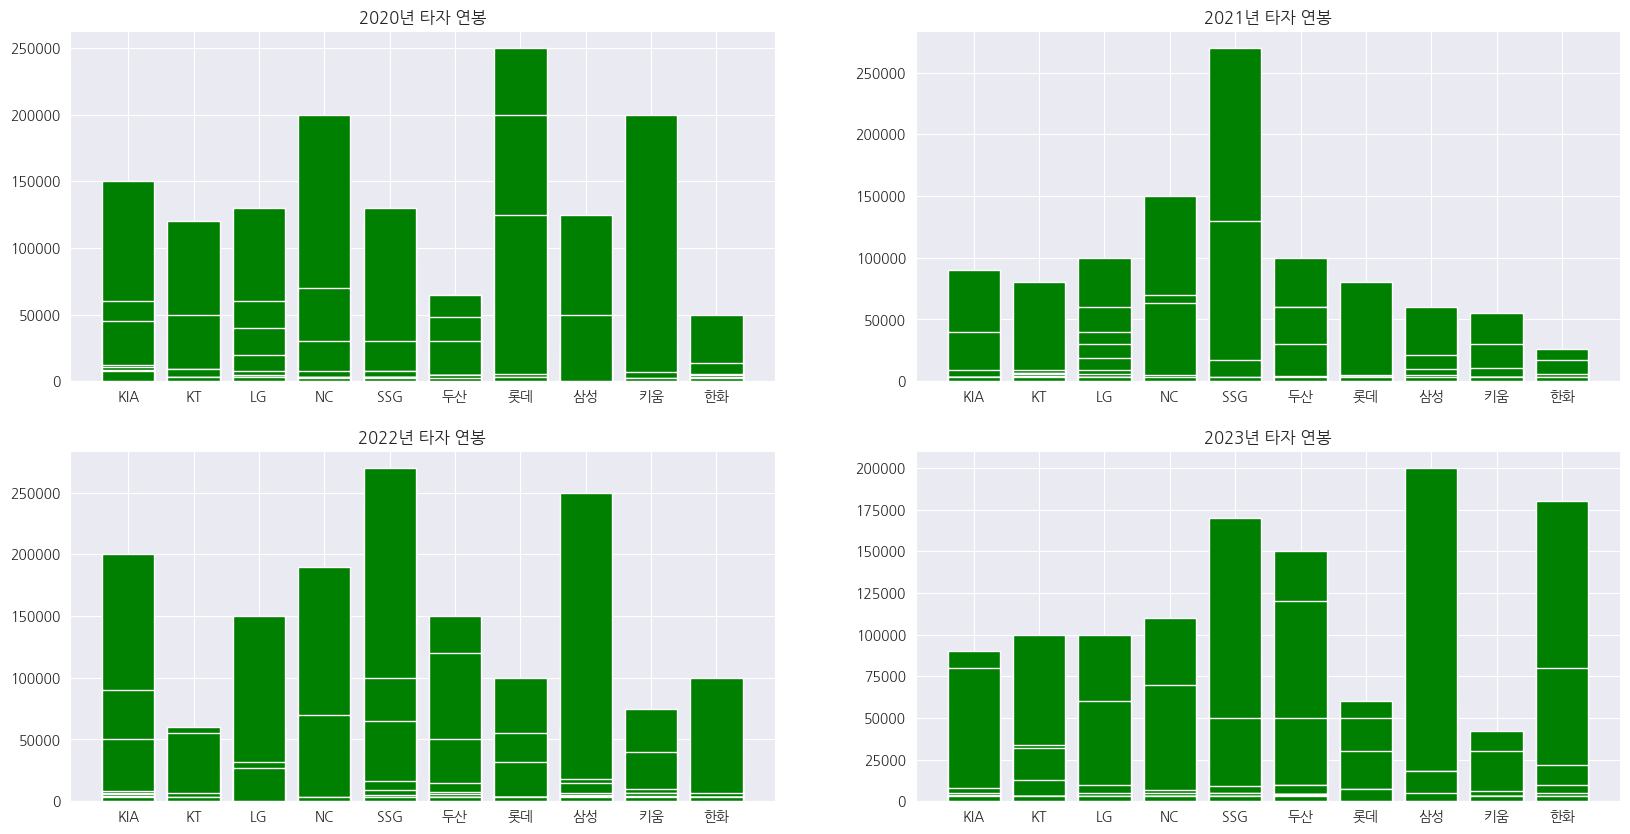

In [239]:
col_n = 2
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))

for i in range(0,4):
    df_year = df_eda.loc[df_eda['연도'] == 2020+i]
    ax[int(i/2),int(i%2)].bar(df_year['팀명'],df_year['연봉(만원)'],color='green')
    ax[int(i/2),int(i%2)].set_title(f'{2020+i}년 타자 연봉')

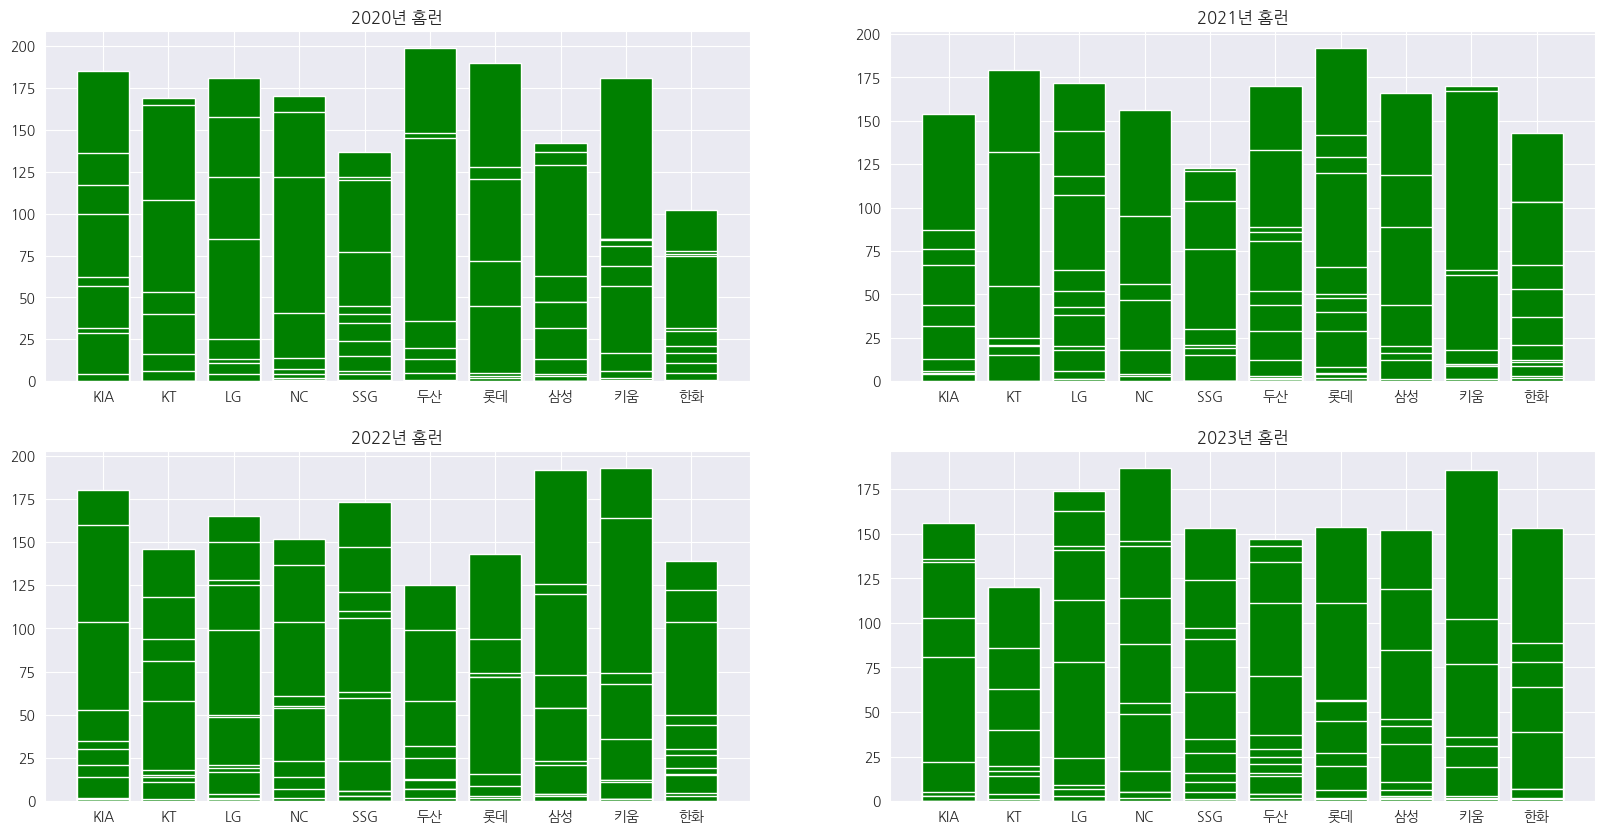

In [240]:
col_n = 2
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))

for i in range(0,4):
    df_year = df_eda.loc[df_eda['연도'] == 2020+i]
    ax[int(i/2),int(i%2)].bar(df_year['팀명'],df_year['H'],color='green')
    ax[int(i/2),int(i%2)].set_title(f'{2020+i}년 홈런')

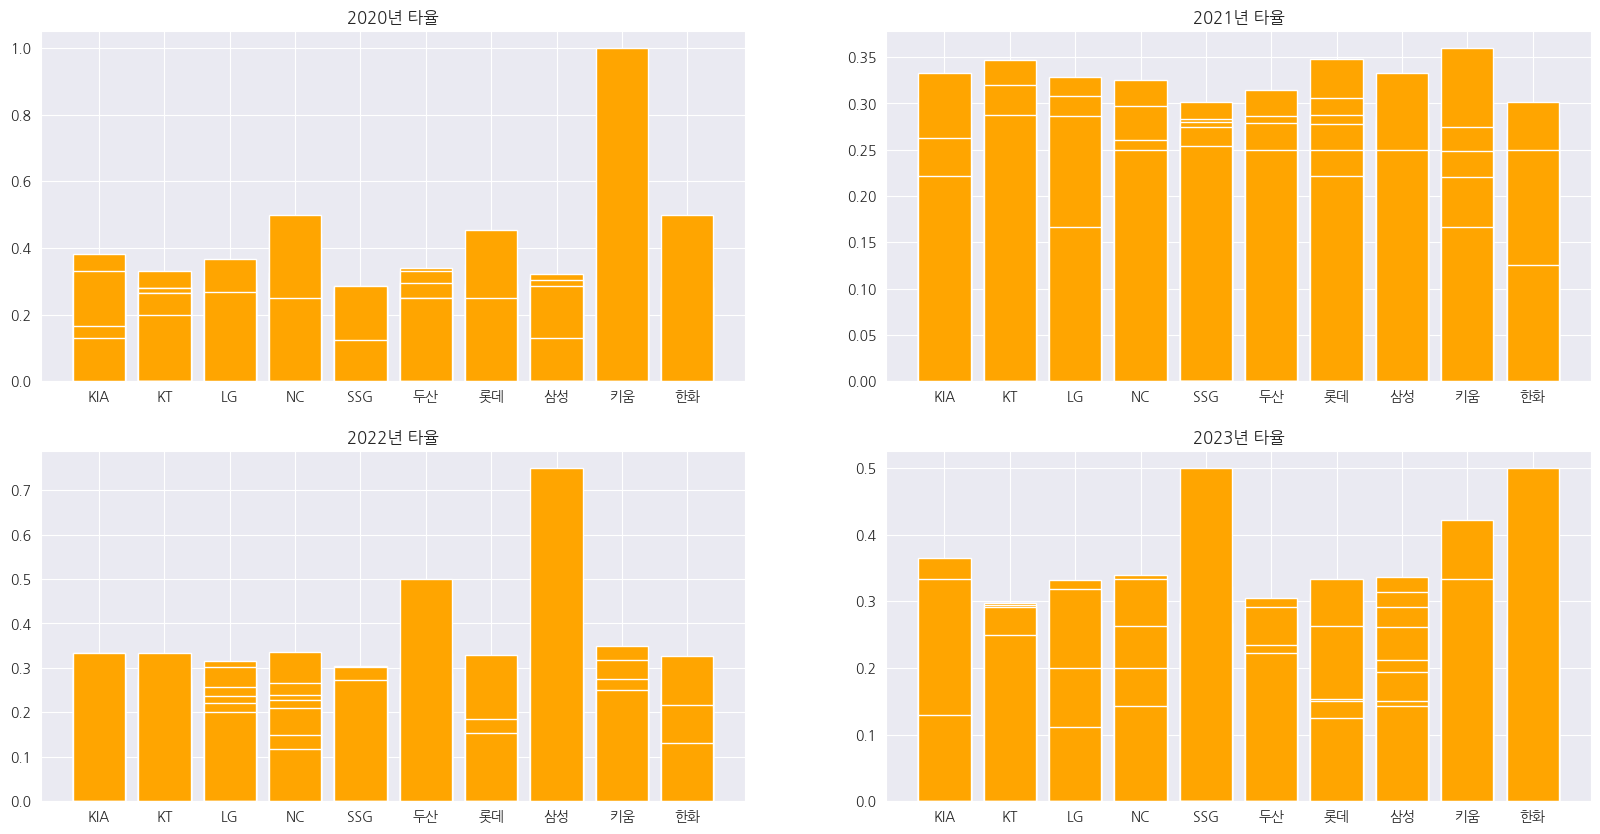

In [363]:
col_n = 2
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))


for i in range(0,4):
    df_year = df_eda.loc[df_eda['연도'] == 2020+i]
    ax[int(i/2),int(i%2)].bar(df_year['팀명'],df_year['AVG'],color='orange')
    ax[int(i/2),int(i%2)].set_title(f'{2020+i}년 타율')

## 3.3 클러스터링

In [245]:
df_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      818 non-null    int64  
 1   선수명     818 non-null    object 
 2   팀명      818 non-null    object 
 3   AVG     818 non-null    float64
 4   G       818 non-null    int64  
 5   PA      818 non-null    int64  
 6   AB      818 non-null    int64  
 7   R       818 non-null    int64  
 8   H       818 non-null    int64  
 9   2B      818 non-null    int64  
 10  3B      818 non-null    int64  
 11  HR      818 non-null    int64  
 12  TB      818 non-null    int64  
 13  RBI     818 non-null    int64  
 14  SAC     818 non-null    int64  
 15  SF      818 non-null    int64  
 16  BB      818 non-null    int64  
 17  IBB     818 non-null    int64  
 18  HBP     818 non-null    int64  
 19  SO      818 non-null    int64  
 20  GDP     818 non-null    int64  
 21  SLG     818 non-null    float64
 22  OB

### 3.3.1 데이터 스케일링

In [386]:
from sklearn.preprocessing import StandardScaler

df_scaler = df_hitter.drop(['연도','연봉(만원)','후년연봉'],axis=1)
df_scaler = df_scaler.iloc[:,3:]
# scaler = StandardScaler()
# df_scaler.loc[:,:] = scaler.fit_transform(df_scaler)

# df_scaler.head()

In [358]:
df_scaler

,AVG,G,PA,AB,R,H,2B,3B,HR,TB,...,HBP,SO,GDP,SLG,OBP,OPS,MH,RISP,PH-BA,WAR
0,0.306,142,631,542,100,166,40,0,32,302,...,9,67,12,0.557,0.398,0.955,44,0.300,0.000,3.46
1,0.223,141,531,480,63,107,16,0,3,132,...,0,87,14,0.275,0.276,0.551,30,0.185,0.000,-0.77
2,0.354,140,600,522,93,185,37,1,28,308,...,5,101,9,0.590,0.433,1.023,55,0.374,1.000,6.59
3,0.291,137,556,468,73,136,19,1,17,208,...,18,114,6,0.444,0.392,0.836,32,0.338,0.250,2.01
4,0.246,126,456,391,38,96,23,0,8,143,...,6,80,14,0.366,0.341,0.707,15,0.308,0.273,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,0.146,27,53,48,5,7,1,0,0,8,...,1,10,3,0.167,0.173,0.340,1,0.125,0.000,-0.45
814,0.114,25,38,35,4,4,1,0,0,5,...,1,10,0,0.143,0.184,0.327,0,0.167,0.200,-0.58
815,0.175,14,42,40,2,7,1,0,0,8,...,0,9,0,0.200,0.214,0.414,2,0.200,0.000,-0.29
816,0.167,7,12,12,1,2,0,0,0,2,...,0,8,0,0.167,0.167,0.334,1,0.250,0.000,-0.35


### 3.3.2 K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

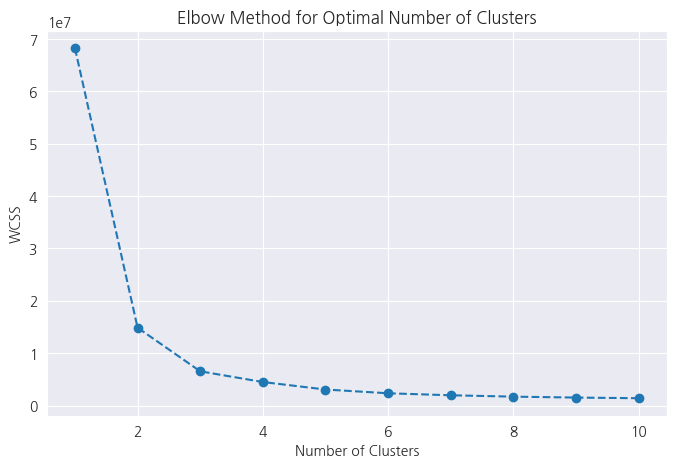

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

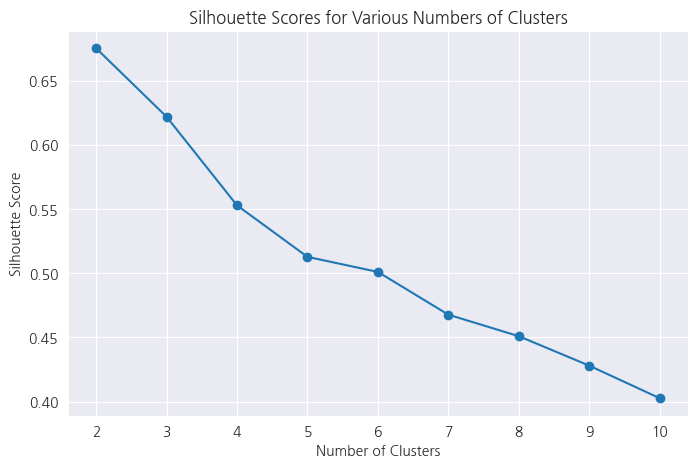

In [296]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.pyplot as plt



# Elbow method (엘보우 방법)
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_scaler)

    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()




# 실루엣 분석을 사용해 최적의 K값 탐색
silhouette_scores = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(df_scaler)
  score = silhouette_score(df_scaler, kmeans.labels_)
  silhouette_scores.append(score)

# 실루엣 분석 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


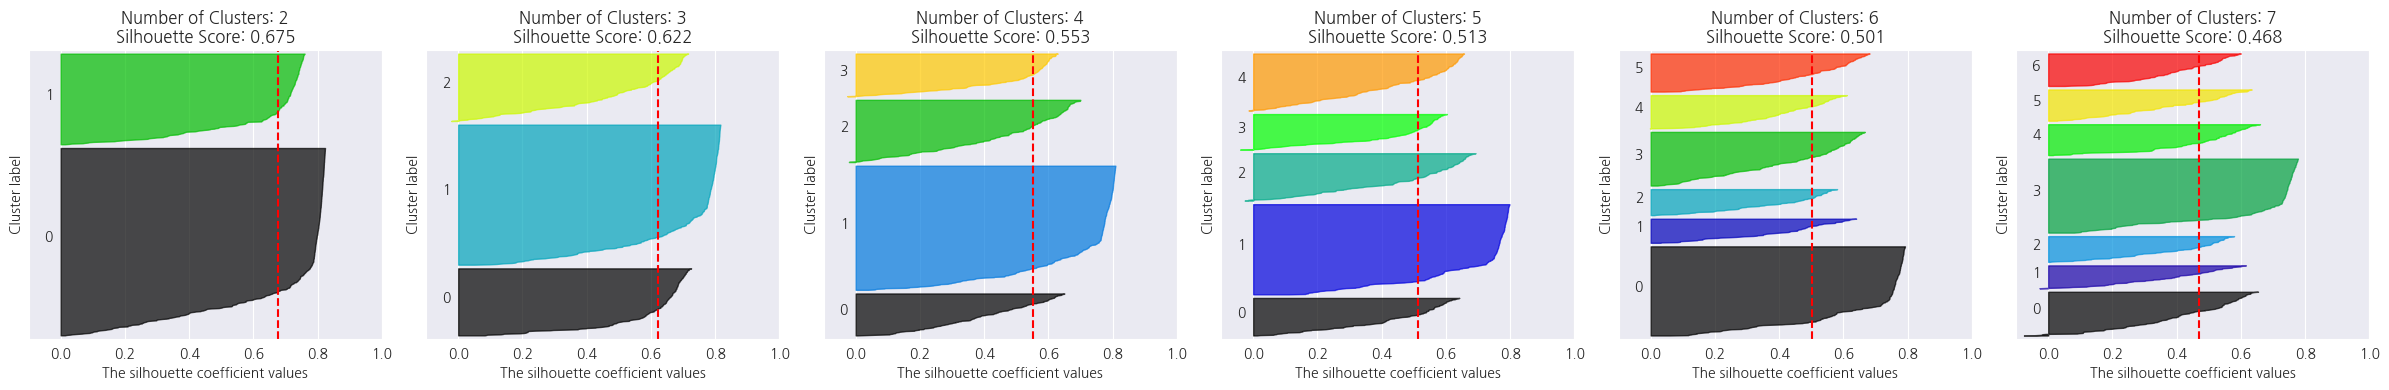

In [286]:
import matplotlib.cm as cm
import numpy as np
# 클러스터 갯수를 리스트로 받아 실루엣 시각화 함수
def visualize_silhouette_kmeans(cluster_lists, X_features):
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans 모델 생성 및 학습
        kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_features)

        # 실루엣 점수 계산
        sil_avg = silhouette_score(X_features, cluster_labels, metric='euclidean')  # 유클리드 거리 사용
        sil_values = silhouette_samples(X_features, cluster_labels, metric='euclidean')  # 유클리드 거리 사용

        y_lower = 10
        axs[ind].set_title(f'Number of Clusters: {n_cluster}\nSilhouette Score: {round(sil_avg, 3)}')
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # y축 레이블 제거
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

    plt.tight_layout()
    plt.show()

# 실루엣 시각화 함수 호출
visualize_silhouette_kmeans(range(2, 8), df_scaler)

In [327]:
df_eda

,선수명,팀명,AVG,G,PA,AB,R,H,2B,3B,...,SLG,OBP,OPS,MH,RISP,PH-BA,연도,연봉(만원),WAR,후년연봉
0,터커,KIA,0.306,142,631,542,100,166,40,0,...,0.557,0.398,0.955,44,0.300,0.000,2020,55000.0,3.46,70000.0
1,박찬호,KIA,0.223,141,531,480,63,107,16,0,...,0.275,0.276,0.551,30,0.185,0.000,2020,10500.0,-0.77,10000.0
2,최형우,KIA,0.354,140,600,522,93,185,37,1,...,0.590,0.433,1.023,55,0.374,1.000,2020,150000.0,6.59,90000.0
3,나지완,KIA,0.291,137,556,468,73,136,19,1,...,0.444,0.392,0.836,32,0.338,0.250,2020,60000.0,2.01,40000.0
4,유민상,KIA,0.246,126,456,391,38,96,23,0,...,0.366,0.341,0.707,15,0.308,0.273,2020,6000.0,-0.25,10500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,유로결,한화,0.146,27,53,48,5,7,1,0,...,0.167,0.173,0.340,1,0.125,0.000,2023,3300.0,-0.45,3300.0
814,하주석,한화,0.114,25,38,35,4,4,1,0,...,0.143,0.184,0.327,0,0.167,0.200,2023,10000.0,-0.58,7000.0
815,이명기,한화,0.175,14,42,40,2,7,1,0,...,0.200,0.214,0.414,2,0.200,0.000,2023,5000.0,-0.29,5000.0
816,김건,한화,0.167,7,12,12,1,2,0,0,...,0.167,0.167,0.334,1,0.250,0.000,2023,3100.0,-0.35,3200.0


In [388]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=7)

# kmeans.fit(df_scaler)
cluster_labels = kmeans.fit_predict(df_scaler)
df_hitter['cluster_label'] = cluster_labels

# # # 개별 클러스터의 중심 위치 좌표
centers = kmeans.cluster_centers_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [298]:
# 각 cluster의 중앙값

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaler.columns)
centroids['cluster'] = centroids.index

In [326]:
centroids

,AVG,G,PA,AB,R,H,2B,3B,HR,TB,...,SO,GDP,SLG,OBP,OPS,MH,RISP,PH-BA,WAR,cluster
0,0.197470,34.522782,56.851319,50.021583,6.827338,10.810552,1.733813,0.160671,0.676259,14.894484,...,13.894484,1.134293,0.267005,0.269396,0.536400,1.812950,0.182367,0.162933,-0.019904,0
1,0.284450,129.305000,519.960000,453.090000,67.750000,129.655000,22.635000,2.045000,12.245000,193.115000,...,79.710000,9.800000,0.422980,0.362985,0.785965,34.620000,0.295120,0.257060,3.445750,1
2,0.247692,90.651741,267.502488,233.582090,30.049751,58.278607,9.815920,0.930348,4.313433,82.895522,...,52.681592,5.084577,0.353507,0.324318,0.677826,13.641791,0.248234,0.208592,0.857811,2


In [291]:
# cluster 중심과의 거리 제곱합 .inertia_
kmeans.inertia_

2359270.6646845704

### 3.3.3 cluster 별 특징 확인

In [389]:
df_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   선수명            818 non-null    object 
 1   팀명             818 non-null    object 
 2   AVG            818 non-null    float64
 3   G              818 non-null    int64  
 4   PA             818 non-null    int64  
 5   AB             818 non-null    int64  
 6   R              818 non-null    int64  
 7   H              818 non-null    int64  
 8   2B             818 non-null    int64  
 9   3B             818 non-null    int64  
 10  HR             818 non-null    int64  
 11  TB             818 non-null    int64  
 12  RBI            818 non-null    int64  
 13  SAC            818 non-null    int64  
 14  SF             818 non-null    int64  
 15  BB             818 non-null    int64  
 16  IBB            818 non-null    int64  
 17  HBP            818 non-null    int64  
 18  SO        

<Axes: xlabel='연봉(만원)', ylabel='G'>

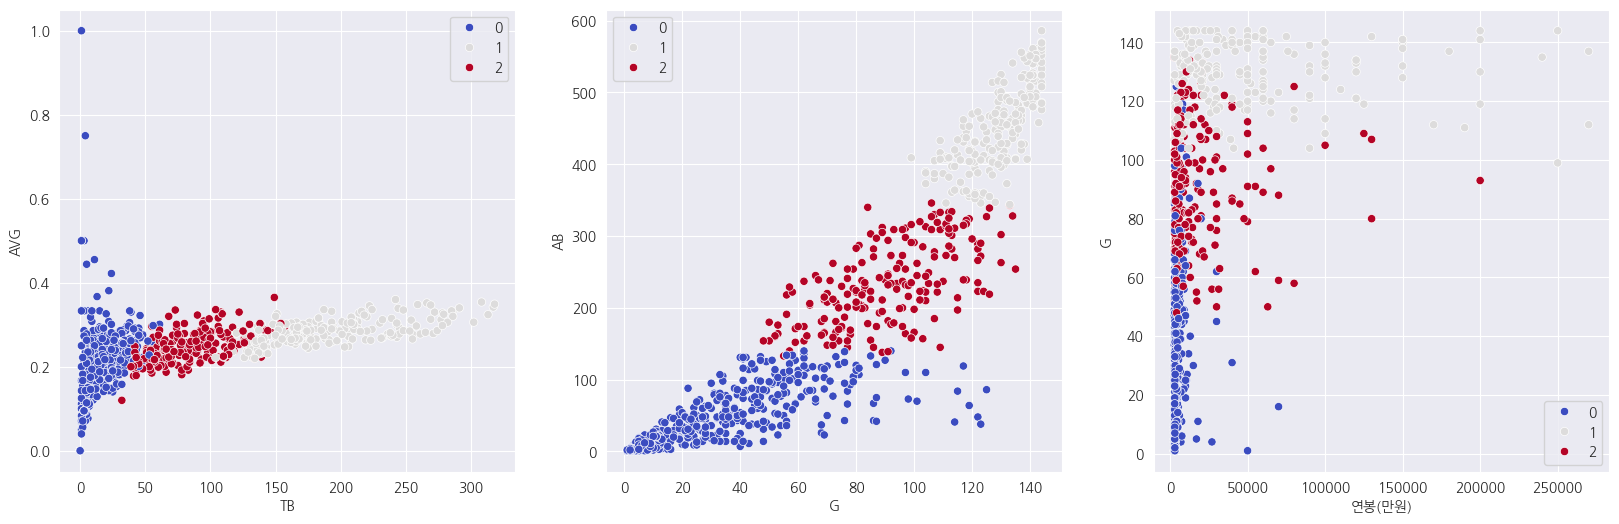

In [392]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.scatterplot(x=df_hitter['TB'], y=df_hitter['AVG'], data=df_hitter, hue=kmeans.labels_, palette='coolwarm')
# plt.ylim([0.2, 0.4])

plt.subplot(132)
sns.scatterplot(x=df_hitter.iloc[:,3], y=df_hitter.iloc[:,5], data=df_hitter, hue=kmeans.labels_, palette='coolwarm')

# plt.subplot(133)
# sns.scatterplot(x=df_eda.iloc[:,3], y=df_eda.iloc[:,6], data=df_eda, hue=kmeans.labels_, palette='coolwarm')

plt.subplot(133)
sns.scatterplot(y=df_hitter.iloc[:,3], x=df_hitter['연봉(만원)'], data=df_hitter, hue=kmeans.labels_, palette='coolwarm')

<Axes: xlabel='연봉(만원)', ylabel='G'>

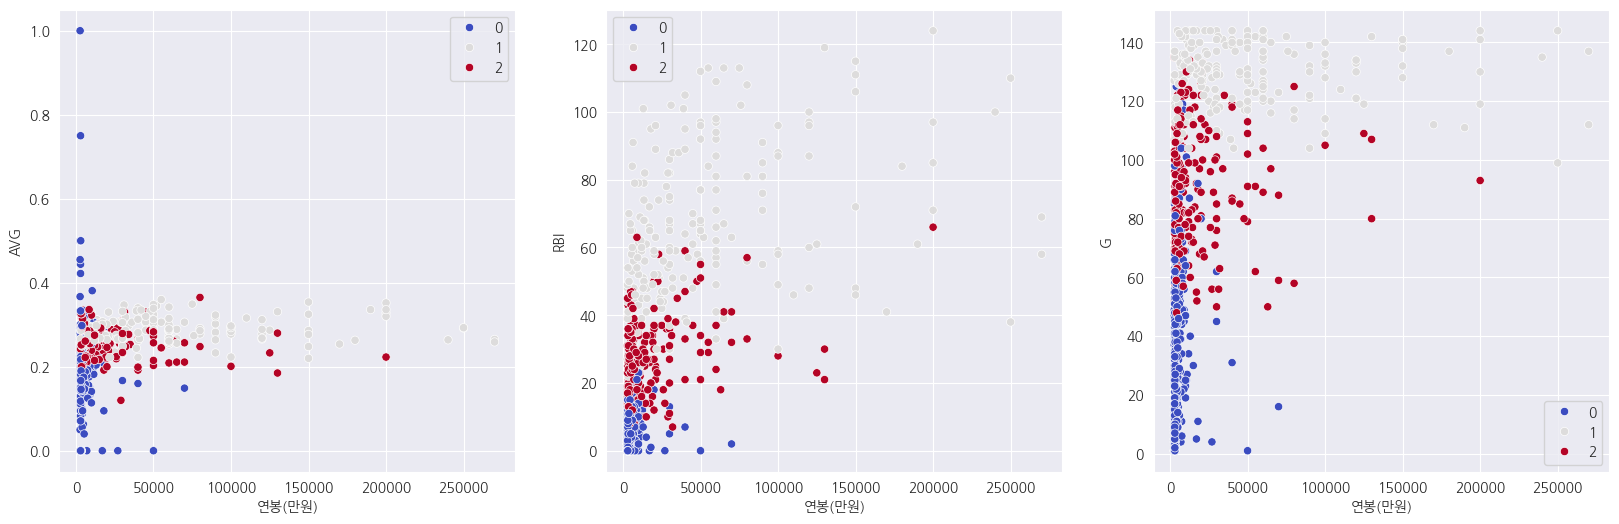

In [417]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.scatterplot(x=df_hitter['연봉(만원)'], y=df_hitter['AVG'], data=df_hitter, hue=kmeans.labels_, palette='coolwarm')
# plt.ylim([0.2, 0.4])

plt.subplot(132)
sns.scatterplot(x=df_hitter['연봉(만원)'], y=df_hitter['RBI'], data=df_hitter, hue=kmeans.labels_, palette='coolwarm')

# plt.subplot(133)
# sns.scatterplot(x=df_eda.iloc[:,3], y=df_eda.iloc[:,6], data=df_eda, hue=kmeans.labels_, palette='coolwarm')

plt.subplot(133)
sns.scatterplot(y=df_hitter.iloc[:,3], x=df_hitter['연봉(만원)'], data=df_hitter, hue=kmeans.labels_, palette='coolwarm')

### 3.3.4 cluster label 1의 특징 확인

Text(0.5, 1.0, '득점권타율 & 출루율')

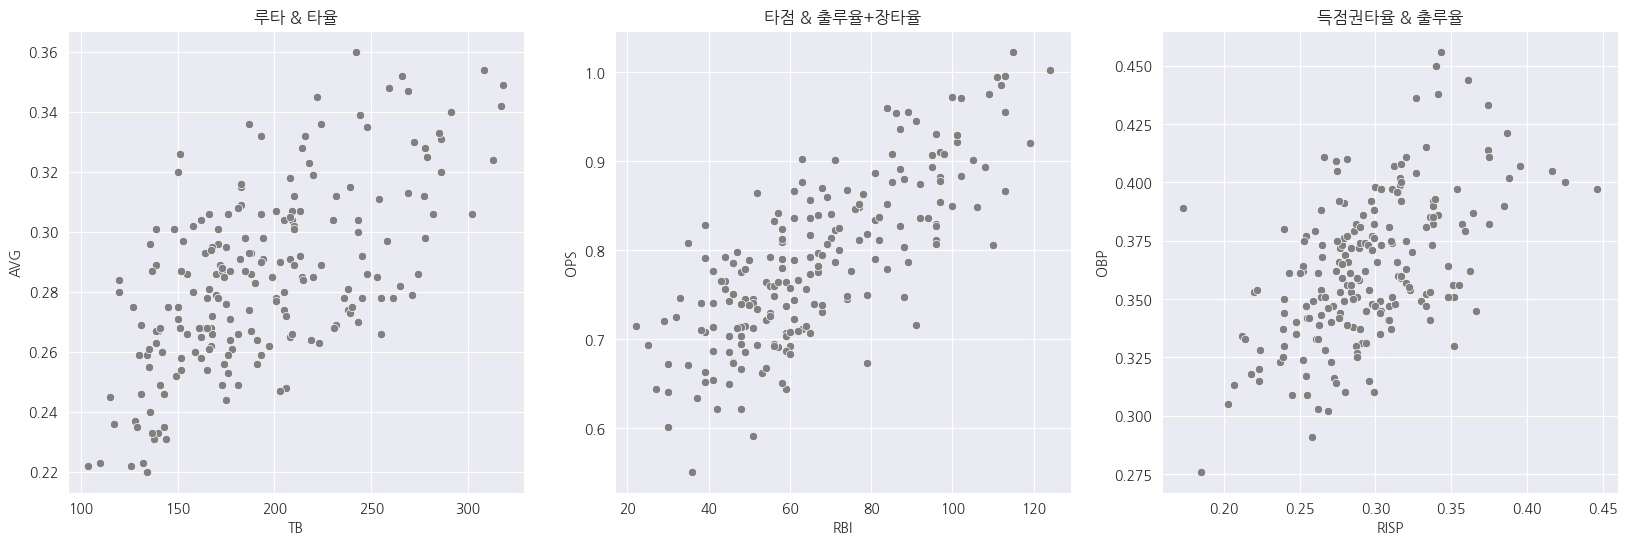

In [405]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
df_cluster1 = df_hitter.loc[df_hitter['cluster_label']==1]
sns.scatterplot(x=df_cluster1['TB'], y=df_cluster1['AVG'], data=df_cluster1,color='gray')
plt.title('루타 & 타율')

plt.subplot(132)
df_cluster1 = df_hitter.loc[df_hitter['cluster_label']==1]
sns.scatterplot(x=df_cluster1['RBI'], y=df_cluster1['OPS'], data=df_cluster1,color='gray')
plt.title('타점 & 출루율+장타율')

plt.subplot(133)
df_cluster1 = df_hitter.loc[df_hitter['cluster_label']==1]
sns.scatterplot(x=df_cluster1['RISP'], y=df_cluster1['OBP'], data=df_cluster1,color='gray')
plt.title('득점권타율 & 출루율')


**루타도 많고 타율도 높은 편 --> 잘하는 선수 군집인가?**

Text(0.5, 1.0, '연봉 & 타석')

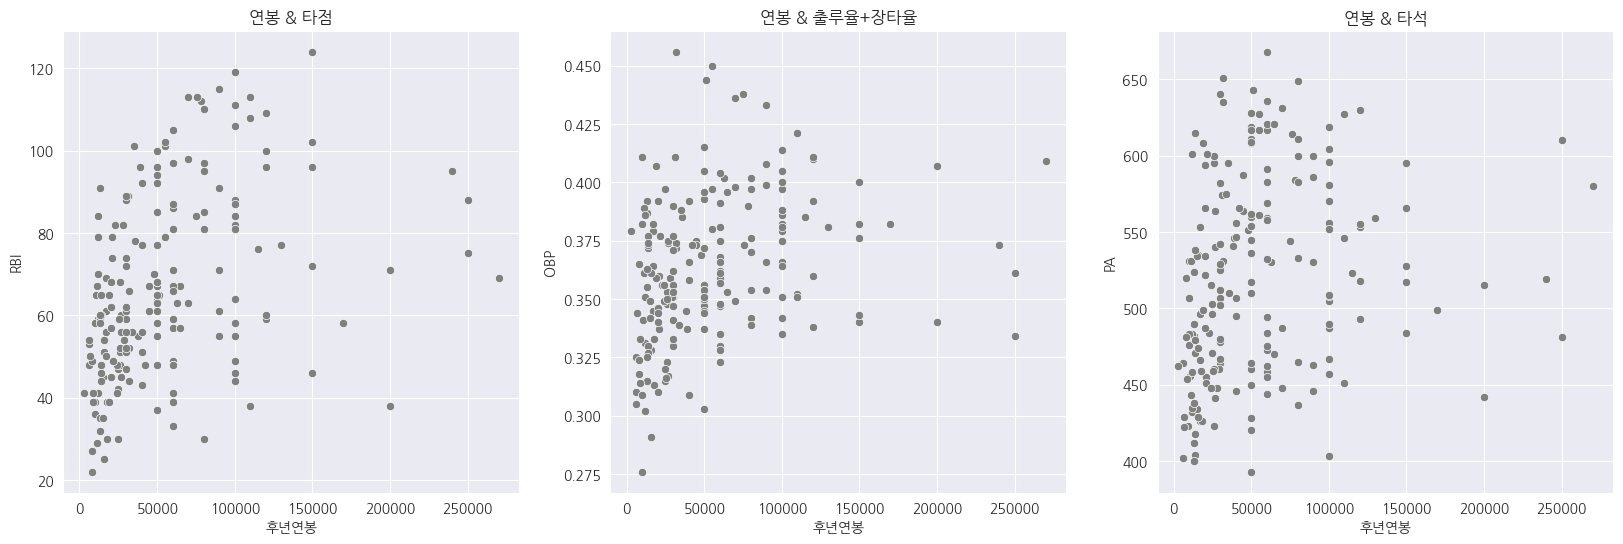

In [418]:
plt.figure(figsize=(20, 6))


df_cluster1 = df_hitter.loc[df_hitter['cluster_label']==1]

plt.subplot(131)
sns.scatterplot(x=df_cluster1['후년연봉'], y=df_cluster1['RBI'], data=df_cluster1,color='gray')
plt.title('연봉 & 타점')

plt.subplot(132)
sns.scatterplot(x=df_cluster1['후년연봉'], y=df_cluster1['OBP'], data=df_cluster1,color='gray')
plt.title('연봉 & 출루율+장타율')

plt.subplot(133)
sns.scatterplot(x=df_cluster1['후년연봉'], y=df_cluster1['PA'], data=df_cluster1,color='gray')
plt.title('연봉 & 타석')


### 3.3.5 cluster 0의 특징 확인

Text(0.5, 1.0, '득점권타율 & 출루율')

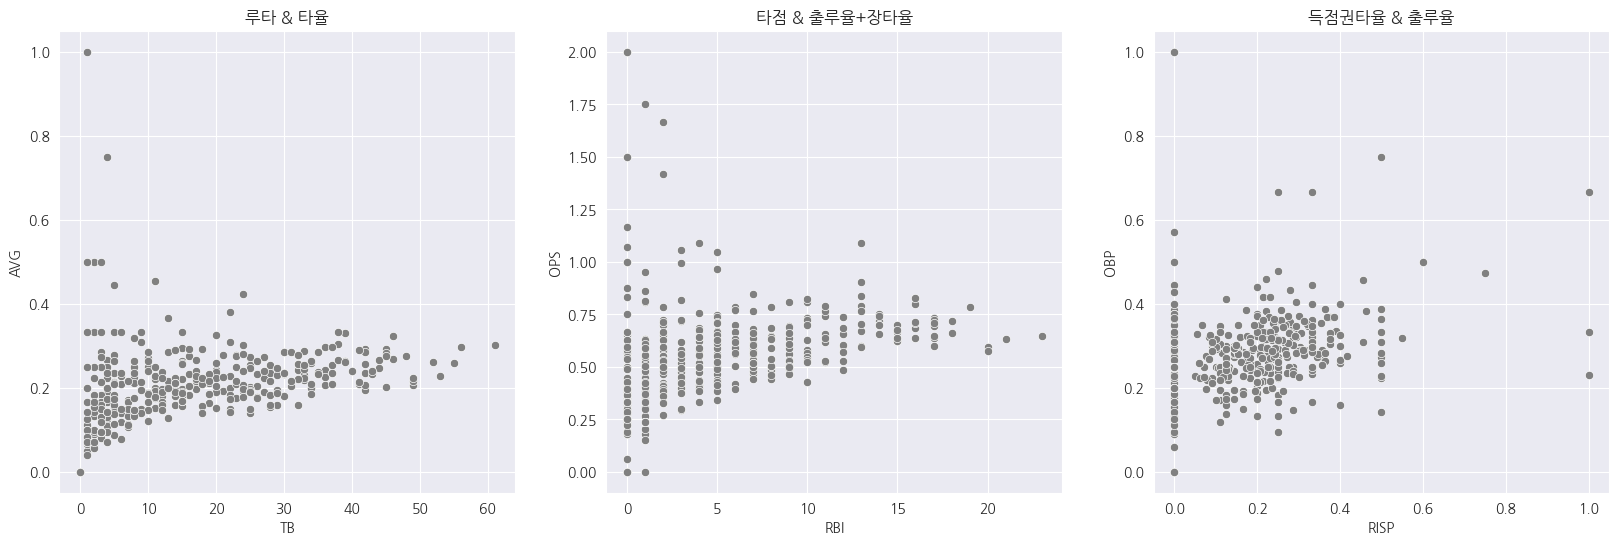

In [413]:
plt.figure(figsize=(20, 6))

df_cluster0 = df_hitter.loc[df_hitter['cluster_label']==0]


plt.subplot(131)
sns.scatterplot(x=df_cluster0['TB'], y=df_cluster0['AVG'], data=df_cluster0,color='gray')
plt.title('루타 & 타율')

plt.subplot(132)
df_cluster1 = df_hitter.loc[df_hitter['cluster_label']==1]
sns.scatterplot(x=df_cluster0['RBI'], y=df_cluster0['OPS'], data=df_cluster0,color='gray')
plt.title('타점 & 출루율+장타율')

plt.subplot(133)
df_cluster1 = df_hitter.loc[df_hitter['cluster_label']==1]
sns.scatterplot(x=df_cluster0['RISP'], y=df_cluster0['OBP'], data=df_cluster0,color='gray')
plt.title('득점권타율 & 출루율')


Text(0.5, 1.0, '연봉 & 타석')

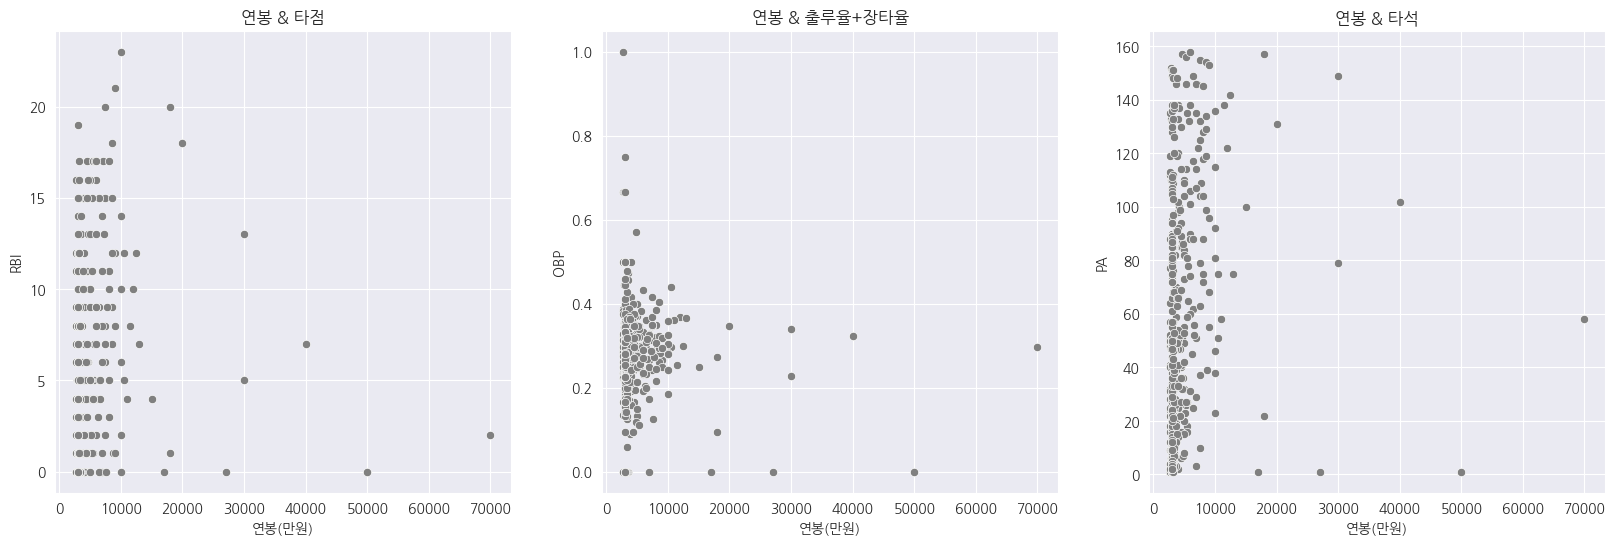

In [414]:
plt.figure(figsize=(20, 6))


plt.subplot(131)
sns.scatterplot(x=df_cluster0['연봉(만원)'], y=df_cluster0['RBI'], data=df_cluster0,color='gray')
plt.title('연봉 & 타점')

plt.subplot(132)
sns.scatterplot(x=df_cluster0['연봉(만원)'], y=df_cluster0['OBP'], data=df_cluster0,color='gray')
plt.title('연봉 & 출루율+장타율')

plt.subplot(133)
sns.scatterplot(x=df_cluster0['연봉(만원)'], y=df_cluster0['PA'], data=df_cluster0,color='gray')
plt.title('연봉 & 타석')


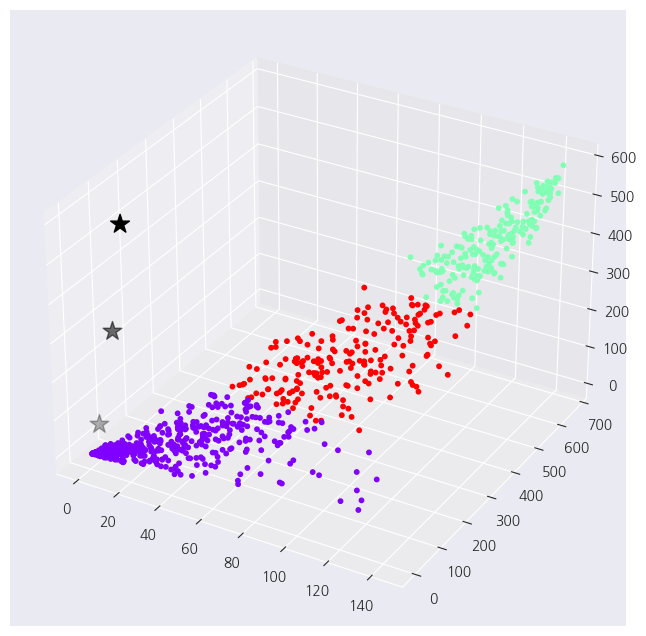

In [349]:
# 3차원으로 시각화하기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = df_eda

# 데이터 scatterplot
ax.scatter(  X.iloc[:,3]
           , X.iloc[:,4]
           , X.iloc[:,5]
           , c = X['cluster_label']
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')


plt.show()